Compute extreme precipitation indices <br>
https://www.guillaumedueymes.com/post/extreme_precipitation/  <br>

a set of eight frequency and intensity precipitation indices:
 - PrecTOT: Total cumulated precipitation
 
 - MOY: Mean precipitation value 
 
 - Prcp1: No of wet days (precipitation ≥ 1 mm) [%]
 
 - SDII: The mean precipitation intensity is defined simply by the amount of total precipitation falling in a wet day (using the threshold ≥ 1 mm/day to define a wet day).  

 - CDD: The maximum number of consecutive dry days is used to characterize the length of dry spells.

 - CWD: The maximum number of consecutive wet days is used to characterize the length of wet spells.

 - R3D:The greatest three days total rainfall describes extremes in precipitation amount.

 - Prec90p: For a very wet day, the 90th percentile value is obtained from all non-zero total precipitation events (i.e. ≥ 1 mm/day).
 
 we use timeseries daily precipitation data from PRISM

casper_2020

In [1]:
import pandas as pd
import os
from datetime import date
import calendar
import numpy as np
from dateutil.relativedelta import relativedelta
import warnings
import matplotlib.pylab as plt
import datetime
import seaborn as sns
warnings.filterwarnings("ignore") 

In [15]:
def plot_trend(df, ax):
    '''
    add a trend line to dataframe plot
    Trend line is the average 
    '''
    z = np.polyfit(df.index, df.mean(axis=1), 1)
    p = np.poly1d(z)
    ax.yaxis.set_ticks_position('both')
    ax.plot(df.index, p(df.index))

def create_2d(n_county):
    annual = [] 
    for i in np.arange(n_county):
        annual.append([])
        
    return annual

def ind_2_indice(ind):
    if ind == 'PrecTOT':
        indice = Indices_Precipitation.PrecTOT  
        indice_out = 'PrecTOT'     
    elif ind == 'SDII':
        indice = Indices_Precipitation.SDII
        indice_out = 'SDII'
    elif ind == 'Prcp1':
        indice = Indices_Precipitation.Prcp1
        indice_out = 'Prcp1'
    elif ind == 'CWD':
        indice = Indices_Precipitation.CWD
        indice_out = 'CWD'
    elif ind == 'MOY':
        indice = Indices_Precipitation.MOY
        indice_out = 'MOY'
    elif ind == 'CDD':
        indice = Indices_Precipitation.CDD
        indice_out = 'CDD'   
    elif ind == 'Prec90p':
        indice = Indices_Precipitation.Prec90p
        indice_out = 'Prec90p'
    elif ind == 'R3d':
        indice = Indices_Precipitation.R3d
        indice_out = 'R3d'
        
    return indice

# calculate and plot seasonal extreme indices
def SEASON_IND(year_s, year_e, ind_s):
    '''
    
    '''
    djf = []
    mam = []
    son = []
    jja = []
    incr = date(year_s, 1, 1)
    end  = date(year_e-1, 12, 31)
 
    while incr <= end:
        current_year = str(incr.year)
        last_year = str(incr.year-1)
        try:
            dec = preacc[last_year][np.in1d(preacc[last_year].index.month, [12])]
        except:
            rng_p1 = pd.date_range(end=current_year, periods = 32, freq ='D')
            rng = rng_p1[:len(rng_p1)-1]
            #rng = pd.date_range(last_year, periods=31, freq='D')
            #dec = pd.DataFrame({'datetime': rng, 'variable': [np.nan]*31}, columns = ['datetime','variable']) 
            
            dec = pd.DataFrame( {'Pr': [np.nan]*31}, columns = ['Pr']) 
            dec.index = rng
        
        j_f = preacc[current_year][np.in1d(preacc[current_year].index.month, [1,2])]
        
        djf.append(ind_s(dec.append(j_f).Pr))            
        mam.append(ind_s((preacc[current_year][np.in1d(preacc[current_year].index.month, [3,4,5])]).Pr))
        jja.append(ind_s((preacc[current_year][np.in1d(preacc[current_year].index.month, [6,4,8])]).Pr))
        son.append(ind_s((preacc[current_year][np.in1d(preacc[current_year].index.month, [9,10,11])]).Pr))            
    
        incr = incr + relativedelta(years=1)
        
    TIME=[]
    for y in range(year_s, year_e,1):
        TIME.append(y)
        
    df_season = pd.DataFrame({'Date': TIME, 'Indice DJF': djf, 'Indice MAM':mam, 'Indice JJA':jja, 'Indice SON':son}, 
                         columns = ['Date','Indice DJF', 'Indice MAM', 'Indice JJA', 'Indice SON']) 

    df_season.set_index("Date", inplace = True)
    
    # get current axis the same as ax = plt.gca()
    ax = plt.axes()
    df_season[["Indice DJF", "Indice MAM", "Indice JJA", "Indice SON"]].plot(kind="bar", stacked=True, ax=ax)
    # use the __name__ property to get the function name
    name_func = ind_s.__name__
    ax.set_title(name_func)
   
    ax.set_xlabel('Time')
    
    if name_func == 'PrecTOT' or name_func == 'MOY' or name_func == 'Prec90p' or name_func == 'SDII' or name_func == 'R3d':
        ax.set_ylabel('mm', fontsize=15, color='black', weight='semibold')
    elif name_func == 'CDD' or name_func == 'CWD':
        ax.set_ylabel('day', fontsize=15, color='black', weight='semibold')
    elif name_func == 'Prcp1':
        ax.set_ylabel('%', fontsize=15, color='black', weight='semibold')
        
    figure = ax.get_figure()    
    figure.set_size_inches(12, 8) 
    
    plt.show()

In [16]:
year_s = 1981                               
year_e = 2021  

var_s = 'PR'
county_s = 'Clackamas'

dir_i = '/glade/campaign/mmm/c3we/INNOVATOR/'
flnm = dir_i + var_s + "_1981-2021.csv"
print('read in ', flnm)

df = pd.read_csv(flnm)
print(df.head())

# get column name by df.columns
name_col = df.columns
print(name_col)

# NOTE: df['date']  dtype='object'  it has to be changed to datetime64
# Time series object must have a datetime-like index in order to use Convenince method
df['datetime'] = pd.to_datetime(df.date)
df.index = df['datetime']

df = df.drop(columns = ["date", 'datetime'])
df.head()

read in  /glade/campaign/mmm/c3we/INNOVATOR/PR_1981-2021.csv
         date  year season  Clackamas  Columbia  Multmomah  Washington  \
0  1981-01-01  1981    DJF   0.329228  0.458430   0.000000    1.639850   
1  1981-01-02  1981    DJF   0.110309  0.196446   0.194810    0.343985   
2  1981-01-03  1981    DJF   0.000679  0.000000   0.000000    0.000000   
3  1981-01-04  1981    DJF   0.073056  0.000000   0.000000    0.010075   
4  1981-01-05  1981    DJF   0.000000  0.000413   0.014304    0.000000   

    Yamhill  
0  0.139483  
1  0.002672  
2  0.007845  
3  0.060862  
4  0.000000  
Index(['date', 'year', 'season', 'Clackamas', 'Columbia', 'Multmomah',
       'Washington', 'Yamhill'],
      dtype='object')


,year,season,Clackamas,Columbia,Multmomah,Washington,Yamhill
datetime,,,,,,,
1981-01-01,1981,DJF,0.329228,0.458430,0.000000,1.639850,0.139483
1981-01-02,1981,DJF,0.110309,0.196446,0.194810,0.343985,0.002672
1981-01-03,1981,DJF,0.000679,0.000000,0.000000,0.000000,0.007845
1981-01-04,1981,DJF,0.073056,0.000000,0.000000,0.010075,0.060862
1981-01-05,1981,DJF,0.000000,0.000413,0.014304,0.000000,0.000000


In [17]:
preacc = pd.DataFrame(df.Clackamas.values, columns = ['Pr'])
preacc.index = df.index
preacc.head()

,Pr
datetime,
1981-01-01,0.329228
1981-01-02,0.110309
1981-01-03,0.000679
1981-01-04,0.073056
1981-01-05,0.000000


### Monthly extrememprecipitation indeces

In [18]:
# when functions are put in a common module, it is easier to load an apply funcions
import Indices_Precipitation

list_indices = ['PrecTOT','MOY','SDII' ,'Prcp1','R3d']  
resamp_preacc = []
for ind in list_indices:
    indice = ind_2_indice(ind)
                 
    # resampling the data on monthly frequency, 'M' indicates month   
    # and aggregate data on each monthly bin
    resamp_preacc.append(preacc.resample('M').agg([indice]))

# Concatenating n series horizontally with index = 1
monthly_indices = pd.concat(resamp_preacc, axis=1)
monthly_indices.columns = monthly_indices.columns.droplevel(0)

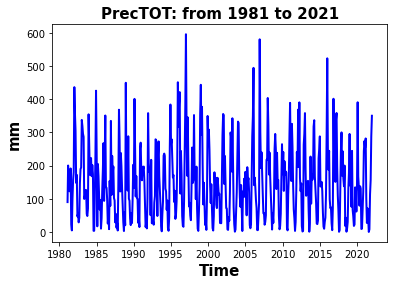

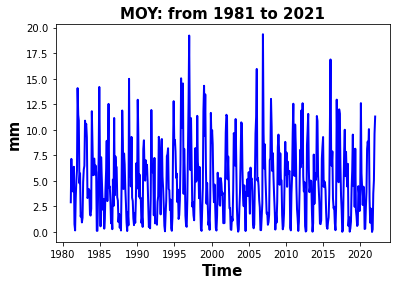

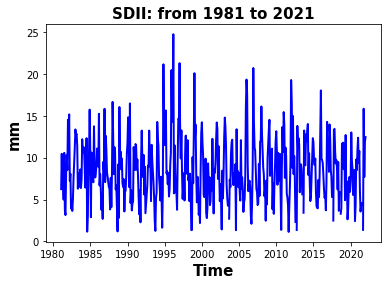

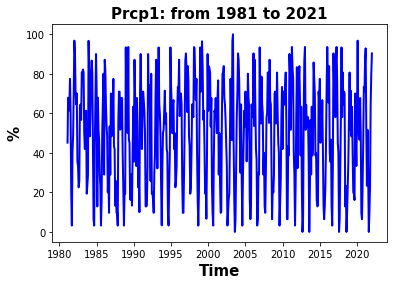

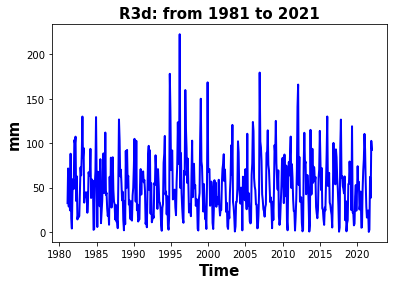

In [19]:
for ind in list_indices:
    plt.plot(monthly_indices.index, monthly_indices[ind],  label=county_s, linewidth=2, c='b')
    plt.title(ind + ': from ' + datetime.date(year_s, 1, 1).strftime('%Y')+ ' to '  + datetime.date(year_e, 1, 1).strftime('%Y'), fontsize=15, color='black', weight='semibold')
    plt.xlabel('Time', fontsize=15, color='black', weight='semibold')
    if ind == 'PrecTOT' or ind == 'MOY' or ind == 'Prec90p' or ind == 'SDII' or ind == 'R3d':
        plt.ylabel('mm', fontsize=15, color='black', weight='semibold')
    elif ind == 'CDD' or ind == 'CWD':
        plt.ylabel('day', fontsize=15, color='black', weight='semibold')
    elif ind == 'Prcp1':
        plt.ylabel('%', fontsize=15, color='black', weight='semibold')

    plt.show()

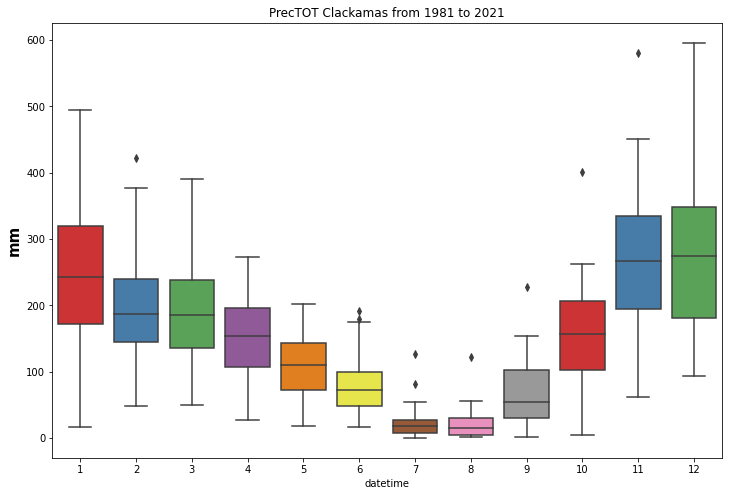

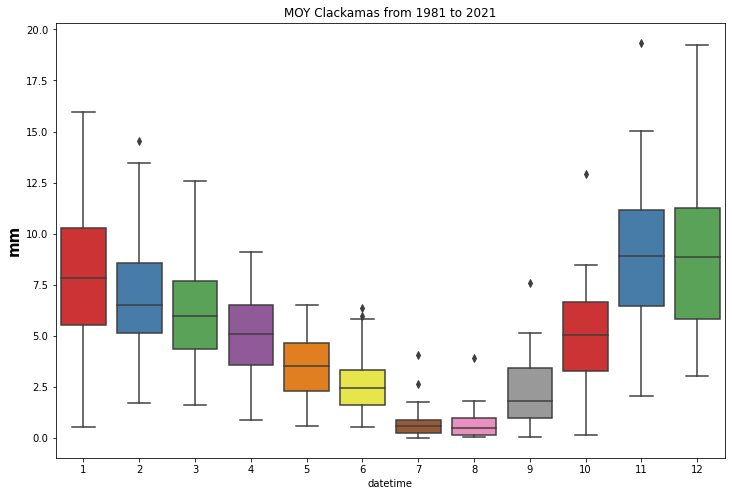

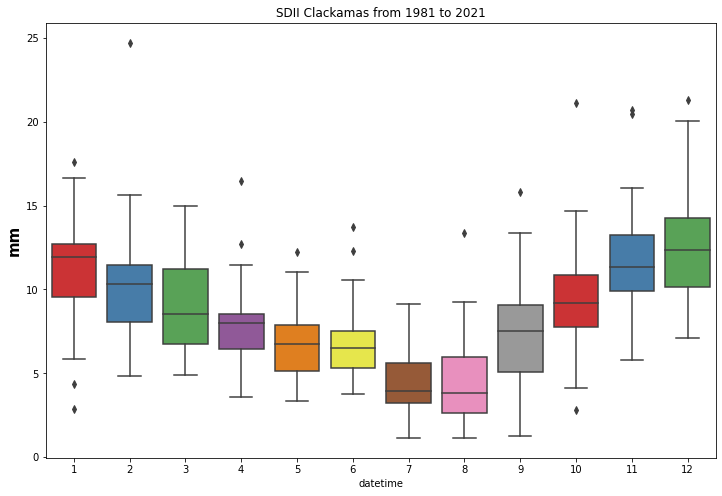

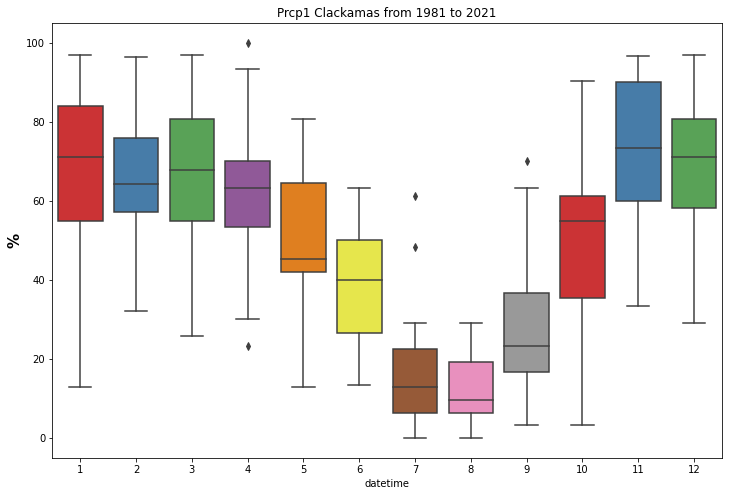

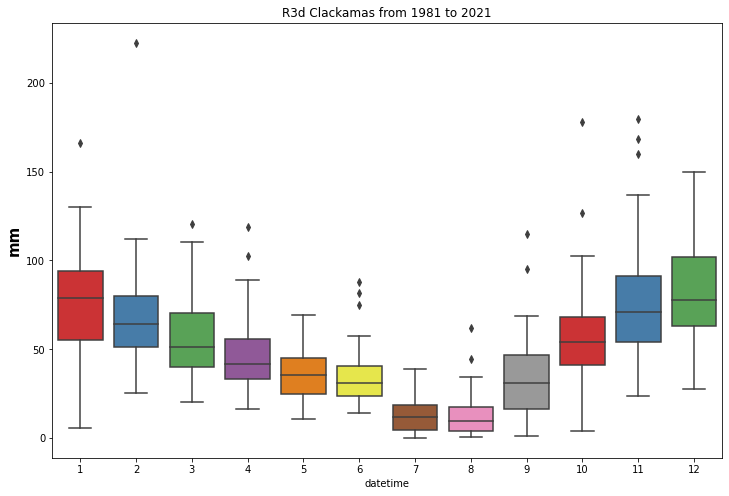

In [20]:
for ind in list_indices:
    ax = plt.axes()
    sns.boxplot(x=monthly_indices.index.month, y=ind, data=monthly_indices, palette="Set1") 
    ax.set_title(ind + " " + county_s + ' from 1981 to 2021')
    if ind == 'PrecTOT' or ind == 'MOY' or ind == 'Prec90p' or ind == 'SDII' or ind == 'R3d':
        plt.ylabel('mm', fontsize=15, color='black', weight='semibold')
    elif ind == 'CDD' or ind == 'CWD':
        plt.ylabel('day', fontsize=15, color='black', weight='semibold')
    elif ind == 'Prcp1':
        plt.ylabel('%', fontsize=15, color='black', weight='semibold')
    

    figure = ax.get_figure()    
    figure.set_size_inches(12, 8) 
    plt.show()

### Compute seasonal extreme precipitation indices

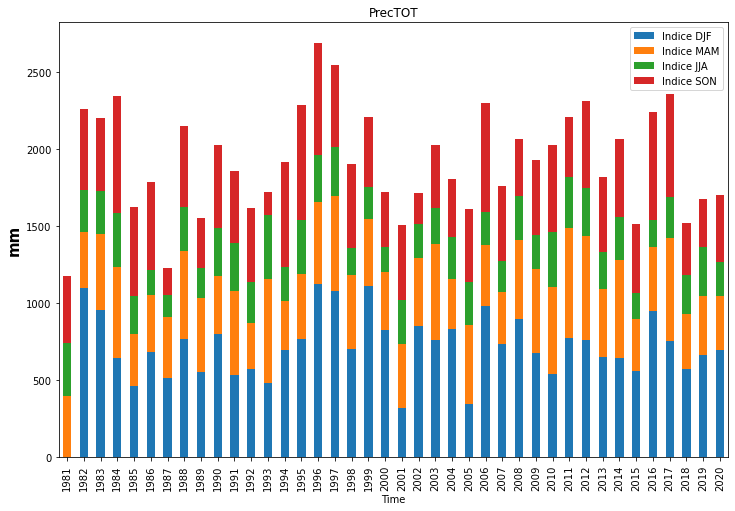

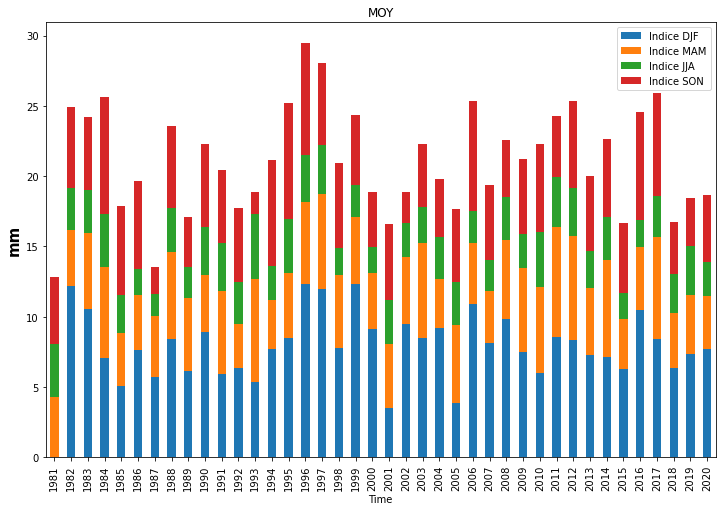

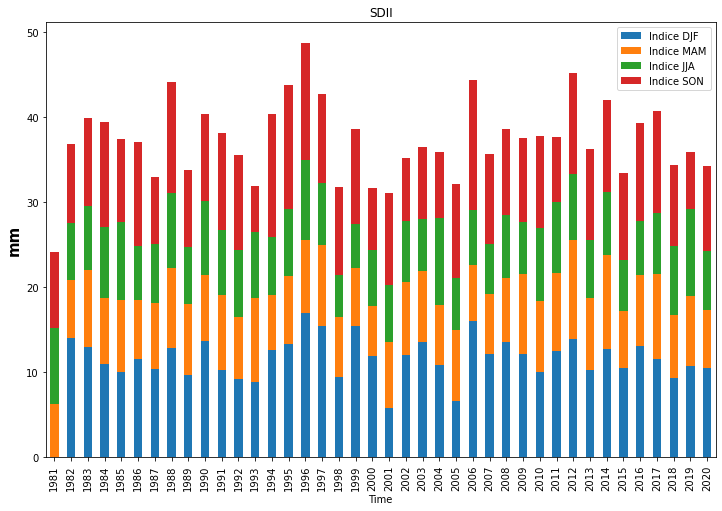

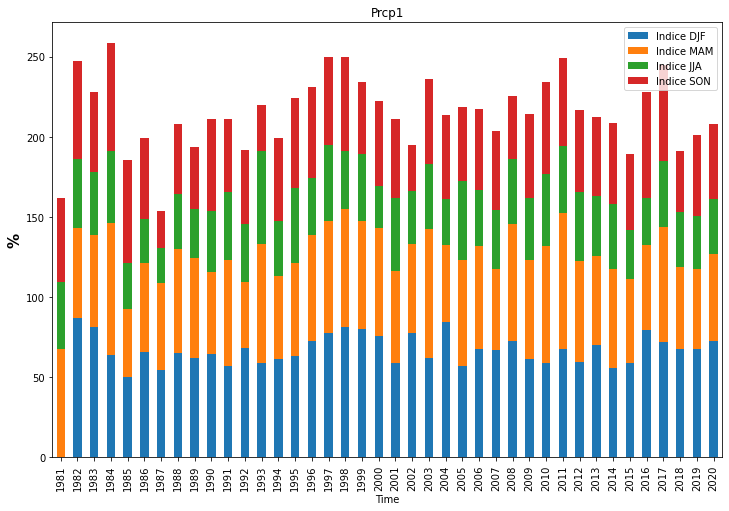

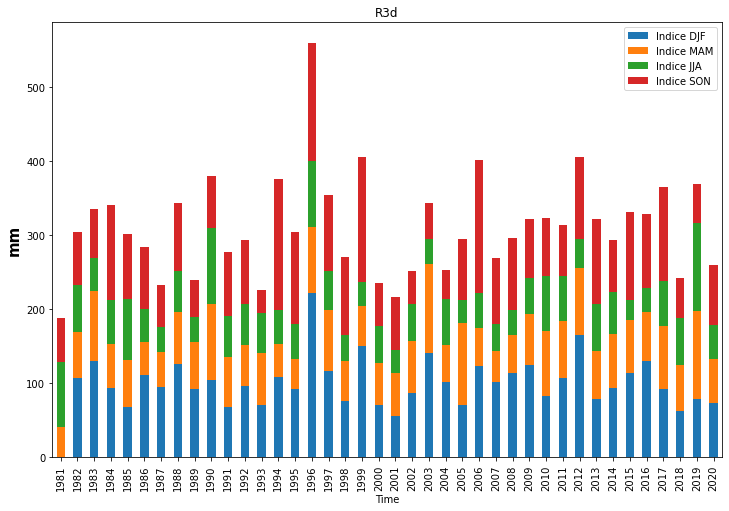

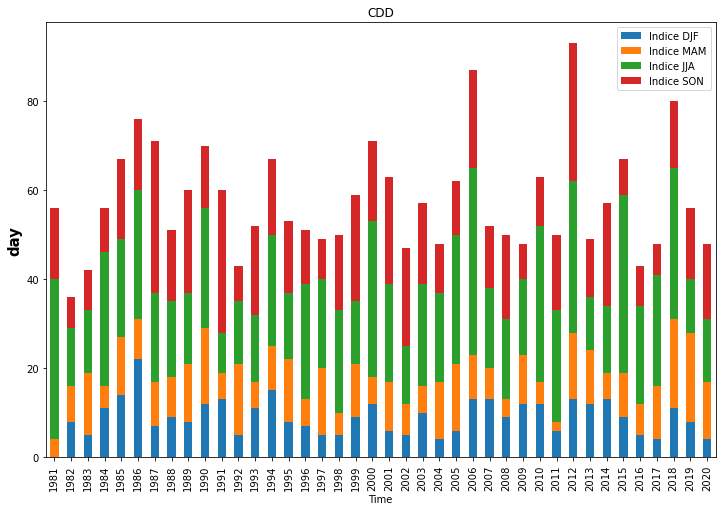

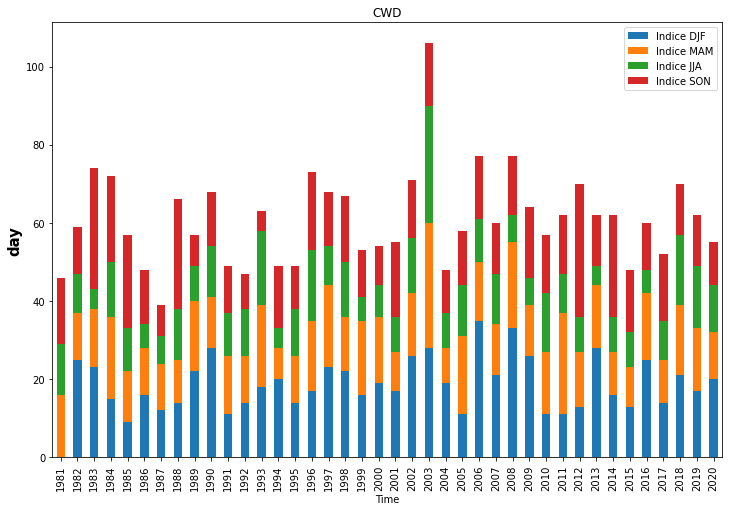

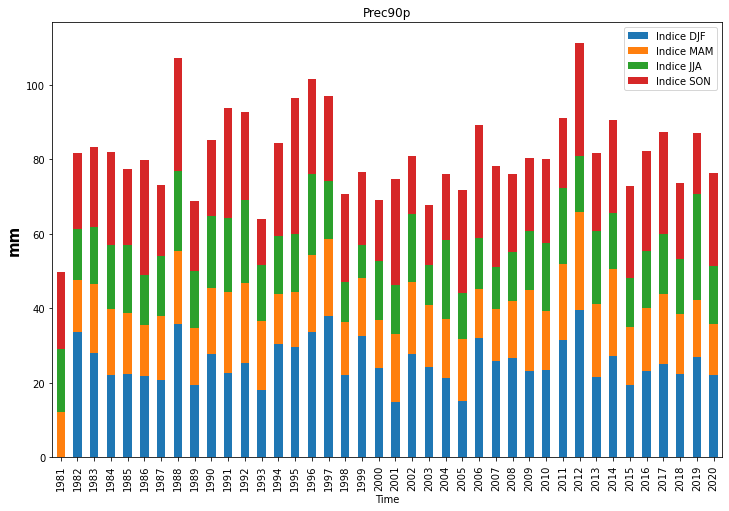

In [21]:
list_indices = ['PrecTOT','MOY','SDII' ,'Prcp1','R3d', "CDD", "CWD", 'Prec90p']   

for ind in list_indices:
    indice = ind_2_indice(ind)
        
    SEASON_IND(year_s, year_e, indice)

### Annual Extreme precipitation indeices of Clackamas county

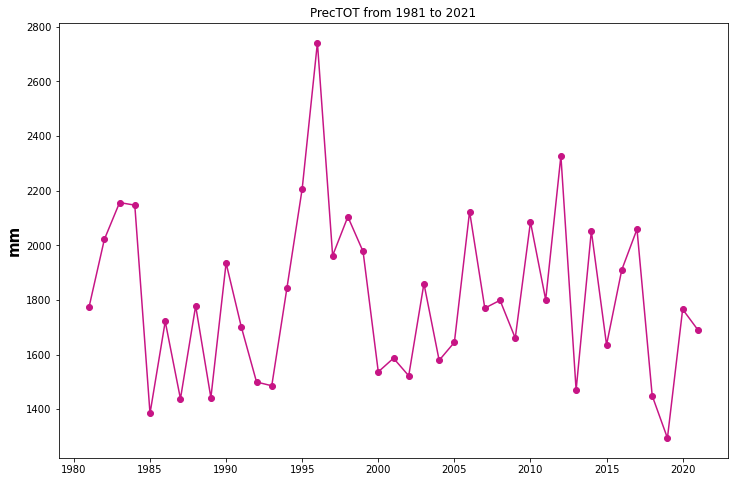

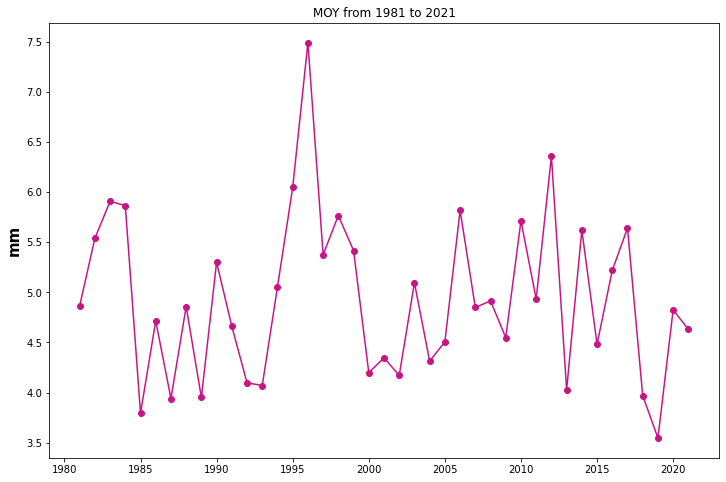

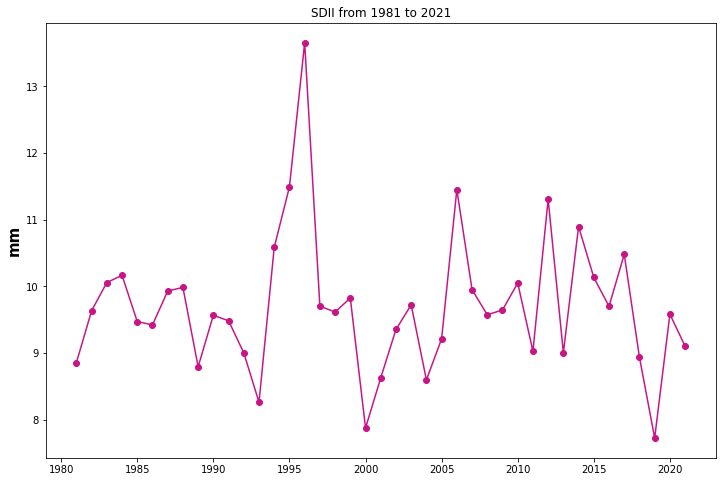

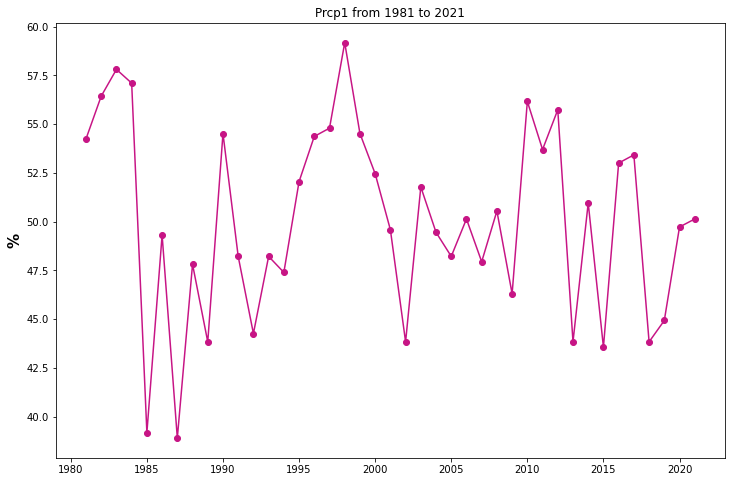

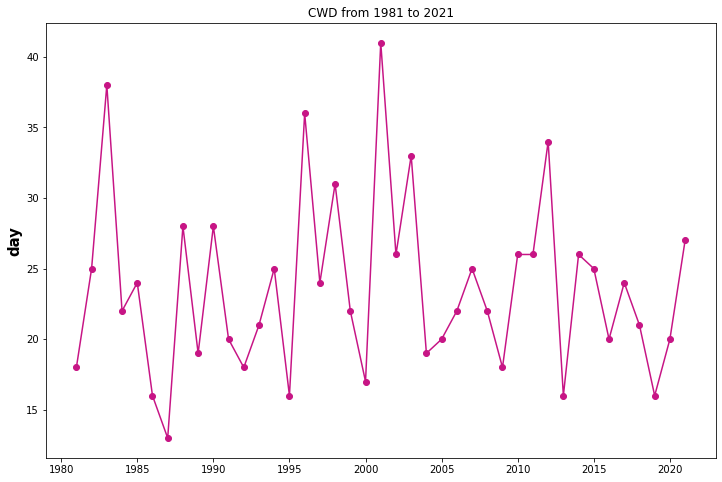

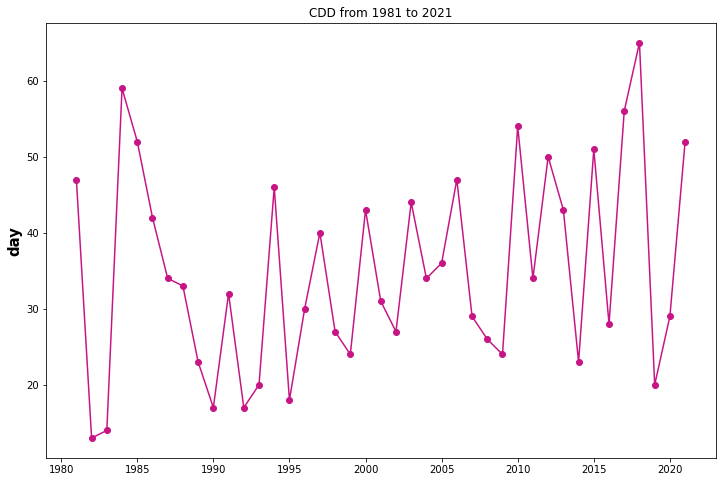

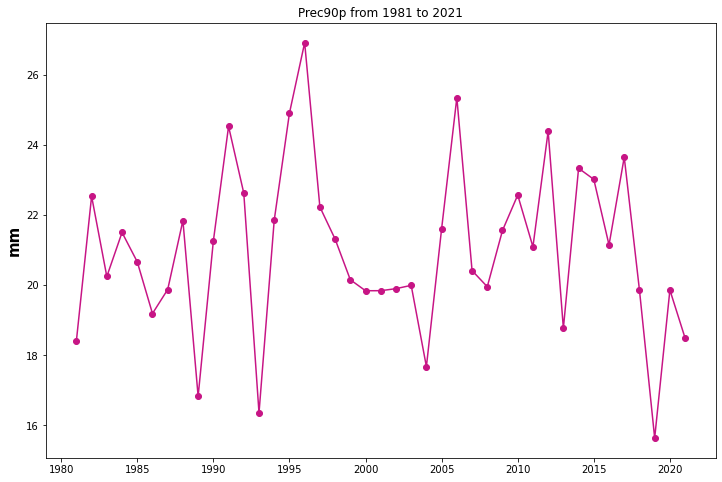

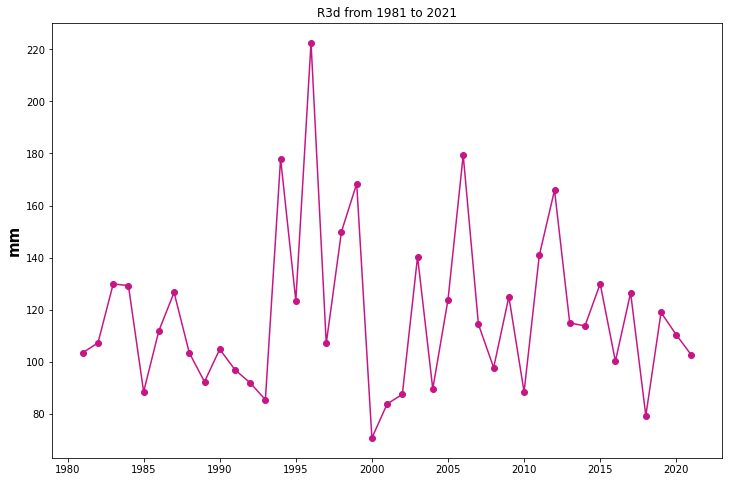

In [22]:
list_indices = ['PrecTOT','MOY','SDII' ,'Prcp1','CWD','CDD','Prec90p','R3d'] 
TIME=[]
for y in range(year_s, year_e+1,1):
    TIME.append(y) 
    
for ind in list_indices:
    indice = ind_2_indice(ind)
        
    annual = []
    df_annual = []
    incr= date(year_s, 1, 1)
    end = date(year_e, 12, 31)
    while incr <= end:
        current_year = str(incr.year)
        #print(ind(preacc[current_year]))
        annual.append(indice(preacc[current_year].values))         
        incr = incr + relativedelta(years=1)
    
    df_annual = pd.DataFrame({'Date': TIME,'Consecutive Dry Days': annual}, columns = ['Date','Consecutive Dry Days'])
    ax = plt.axes()
     
    plt.plot( 'Date', 'Consecutive Dry Days', data=df_annual, marker='o', color='mediumvioletred')
    ax.set_title(ind + ' from 1981 to 2021')
    if ind == 'PrecTOT' or ind == 'MOY' or ind == 'Prec90p' or ind == 'SDII' or ind == 'R3d':
        ax.set_ylabel('mm', fontsize=15, color='black', weight='semibold')
    elif ind == 'CDD' or ind == 'CWD':
        ax.set_ylabel('day', fontsize=15, color='black', weight='semibold')
    elif ind == 'Prcp1':
        ax.set_ylabel('%', fontsize=15, color='black', weight='semibold')

    figure = ax.get_figure()    
    figure.set_size_inches(12, 8) 
    plt.show()

### Annual extreme precipitation indices of 
Clackamas, Columbia, Multmomah, Washington, Yamhill county
trend line is the average of those counties

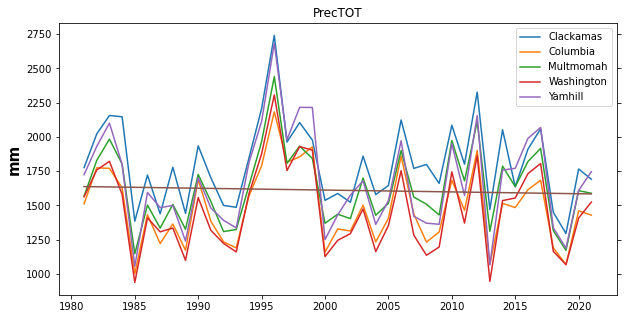

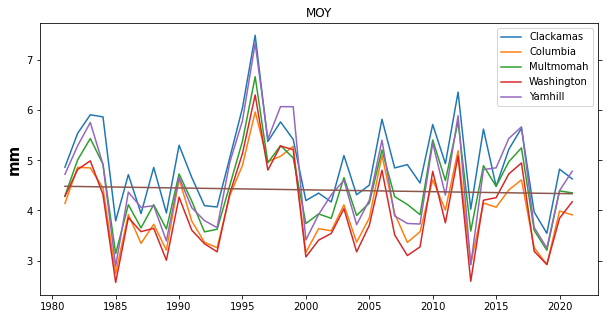

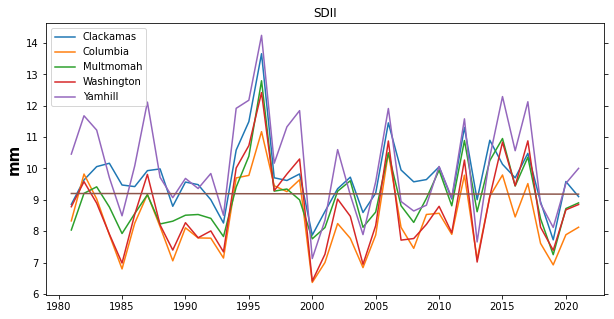

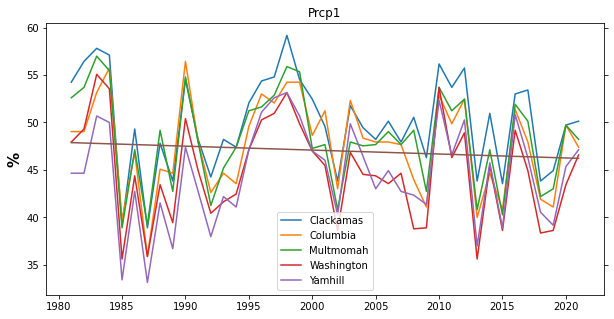

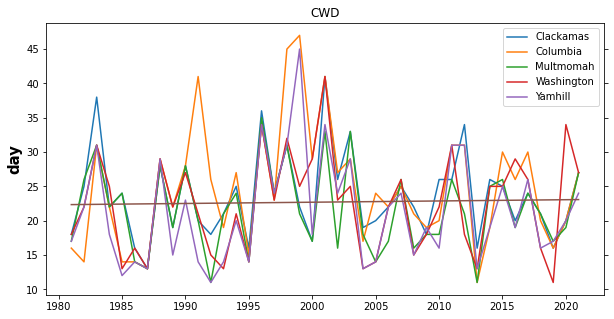

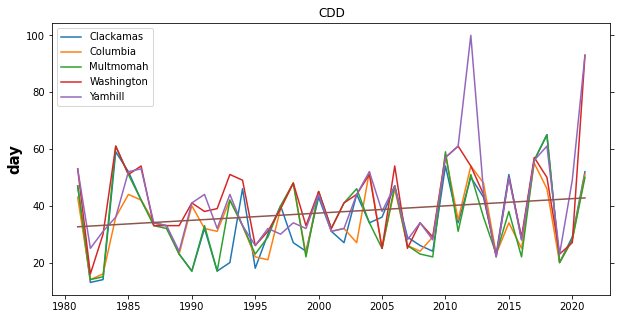

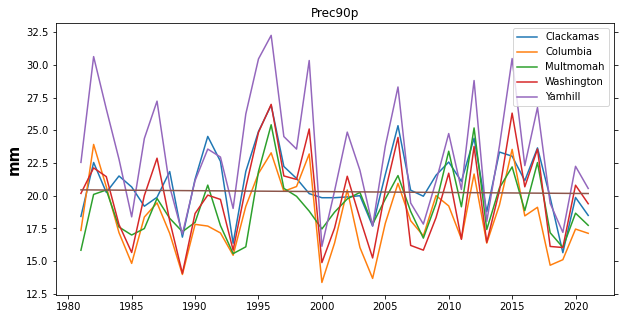

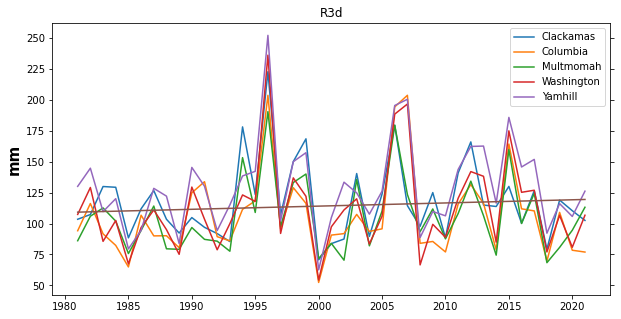

In [23]:
list_indices = ['PrecTOT','MOY','SDII' ,'Prcp1','CWD','CDD','Prec90p','R3d'] 
#list_indices = ['PrecTOT']
list_county = ['Clackamas','Columbia', 'Multmomah', 'Washington','Yamhill']
n_county = len(list_county)


TIME=[]
year_e = 2021
for y in range(year_s, year_e+1,1):
    TIME.append(y) 

    
for ind in list_indices:
    indice = ind_2_indice(ind)
    
    annual = create_2d(n_county)

    df_annual = []
    incr= date(year_s, 1, 1)
    end = date(year_e, 12, 31)
    while incr <= end:
        current_year = str(incr.year)
        for nc in np.arange(n_county):
            annual[nc].append(indice(df.iloc[:,nc+2][current_year].values))                    
                  
        incr = incr + relativedelta(years=1)
    
    fig, ax = plt.subplots(1,1, figsize=(10,5))
    # use zip to aggregate elements from two or more iterables.
    # It generates a series of tuples containing elements from each iterable
    # df_annual = pd.DataFrame(list(zip(annual[0],annual[1],annual[2],annual[3],annual[4])),  columns = list_county)
    # np.float_(): convert items in a list to float
    df_annual = pd.DataFrame(np.transpose(np.float_(annual)), columns = list_county)
    df_annual.index = TIME
     
    if ind == 'PrecTOT' or ind == 'MOY' or ind == 'Prec90p' or ind == 'SDII' or ind == 'R3d':
        ax.set_ylabel('mm', fontsize=15, color='black', weight='semibold')
    elif ind == 'CDD' or ind == 'CWD':
        ax.set_ylabel('day', fontsize=15, color='black', weight='semibold')
    elif ind == 'Prcp1':
        ax.set_ylabel('%', fontsize=15, color='black', weight='semibold')
        
    df_annual.plot(title=ind, ax=ax)
    plot_trend(df_annual, ax)

      